# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
cars = pd.read_csv('cars.csv')
print(cars)

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

In [4]:
cars.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

In [16]:
cars.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [17]:
cars.tail()

,Car,Model,Volume,Weight,CO2
31,Volvo,XC70,2000,1746,117
32,Ford,B-Max,1600,1235,104
33,BMW,216,1600,1390,108
34,Opel,Zafira,1600,1405,109
35,Mercedes,SLK,2500,1395,120


In [18]:
cars.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [20]:
X = cars[['Weight', 'Volume']]
y = cars['CO2']

In [21]:
# Split 80% of the data to the training set while 20% of the data to test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:

regressor =LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
print('Linear Model Coeff (m) =' , regressor.coef_)
print('Linear Model Coeff (b) =' , regressor.intercept_)

Linear Model Coeff (m) = [0.00728963 0.0076251 ]
Linear Model Coeff (b) = 80.5710979169092


In [24]:
y_predict=regressor.predict(X_test)
print(y_predict)

[108.54900223 104.31804036 102.72161109 108.2836746  106.53416307
 102.46647399  96.10255102  94.96826943]


In [25]:
# Prediction the CO2 emission of car using Weight and Volume Value of the car directly
print('---------[700,900]---------')
wg = 700
vol = 900
co2 = regressor.predict([[wg,vol]])
print(co2)
print('--------[1100,1500]----------')
wg = 1100
vol = 1500
co2 = regressor.predict([[wg,vol]])
print(co2)
print('--------[1500,2500]----------')
wg = 1500
vol = 2500
co2 = regressor.predict([[wg,vol]])
print(co2)

---------[700,900]---------
[92.53643345]
--------[1100,1500]----------
[100.02734838]
--------[1500,2500]----------
[110.56830489]


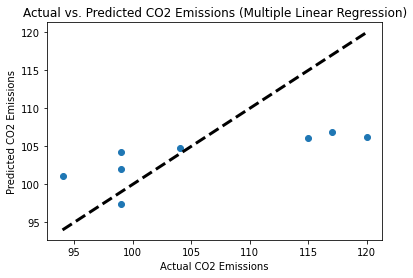

In [6]:
X = cars[['Volume', 'Weight']]
y = cars['CO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Actual CO2 Emissions')
ax.set_ylabel('Predicted CO2 Emissions')
ax.set_title('Actual vs. Predicted CO2 Emissions (Multiple Linear Regression)')
plt.show()